# Credit score classification, Part 2: Exploratory Data Analysis
## Problem Statement :
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Task:
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# Column Descriptions

The dataset contains the following columns:

1. **Month**: The month in which the data was recorded or collected.
2. **Name**: The name of the individual or entity associated with the credit score.
3. **Age**: The age of the individual or age range of the entity.
4. **SSN**: Social Security Number, a unique identifier assigned to individuals in the United States.
5. **Occupation**: The occupation or profession of the individual or entity.
6. **Annual_Income**: The total income earned in a year before taxes and deductions.
7. **Monthly_Inhand_Salary**: The amount of income received by the individual or entity on a monthly basis after taxes and deductions.
8. **Num_Bank_Accounts**: The number of bank accounts held by the individual or entity.
9. **Num_Credit_Card**: The number of credit cards owned by the individual or entity.
10. **Interest_Rate**: The interest rate applied to loans or credit accounts.
11. **Num_of_Loan**: The number of loans held by the individual or entity.
12. **Type_of_Loan**: The type or category of loans, such as personal loans, mortgage loans, etc.
13. **Delay_from_due_date**: The time duration of delayed payments from the due date.
14. **Num_of_Delayed_Payment**: The number of payments that have been delayed or missed.
15. **Changed_Credit_Limit**: Indicates whether the credit limit has been changed or modified.
16. **Num_Credit_Inquiries**: The number of credit inquiries made by the individual or entity, indicating the number of times their credit report has been accessed by lenders.
17. **Credit_Mix**: The variety or types of credit accounts held by the individual or entity, such as credit cards, loans, etc.
18. **Outstanding_Debt**: The amount of debt or outstanding balances on credit accounts.
19. **Credit_Utilization_Ratio**: The ratio of credit used to the total credit available, expressed as a percentage.
20. **Credit_History_Age**: The length of time since the first credit account was opened.
21. **Payment_of_Min_Amount**: Indicates whether the minimum payment amount on credit accounts has been made.
22. **Total_EMI_per_month**: The total Equated Monthly Installment (EMI) amount paid per month.
23. **Amount_invested_monthly**: The amount of money invested on a monthly basis.
24. **Payment_Behaviour**: The payment behavior or history of the individual or entity, indicating whether payments are made on time or delayed.
25. **Monthly_Balance**: The balance or amount remaining in the account at the end of each month.
26. **Credit_Score**: The assigned credit score based on the provided values and factors in the dataset.


### import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the training datasets

In [2]:
df = pd.read_csv("train_cleaned.csv",low_memory=False)

### Check the shape of the datasets

In [3]:
df.shape

(89930, 26)

In [4]:
df.head()

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22.08,No,49.574949,118.280222,High_spent_Medium_value_payments,186.266702,Good
1,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22.08,No,49.574949,118.280222,High_spent_Medium_value_payments,186.266702,Good
2,3,Aaron Maashoh,[32],821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22.08,No,49.574949,118.280222,High_spent_Medium_value_payments,186.266702,Good
3,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22.08,No,49.574949,118.280222,High_spent_Medium_value_payments,186.266702,Good
4,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,22.537593,22.08,No,49.574949,118.280222,High_spent_Medium_value_payments,186.266702,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89930 entries, 0 to 89929
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     89930 non-null  int64  
 1   Name                      89930 non-null  object 
 2   Age                       89930 non-null  object 
 3   SSN                       89930 non-null  object 
 4   Occupation                89930 non-null  object 
 5   Annual_Income             89930 non-null  float64
 6   Monthly_Inhand_Salary     89930 non-null  float64
 7   Num_Bank_Accounts         89930 non-null  int64  
 8   Num_Credit_Card           89930 non-null  int64  
 9   Interest_Rate             89930 non-null  int64  
 10  Num_of_Loan               89930 non-null  int64  
 11  Type_of_Loan              89930 non-null  object 
 12  Delay_from_due_date       89930 non-null  int64  
 13  Num_of_Delayed_Payment    89930 non-null  int64  
 14  Change

### Insight:
we have:  
- 9 float columns.
- 8 int columns.
- 9 string columns.

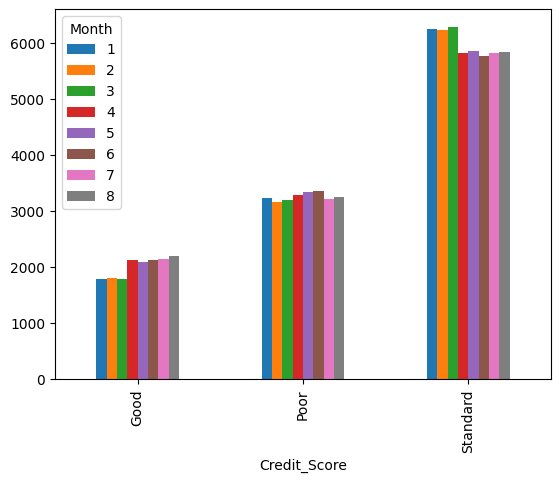

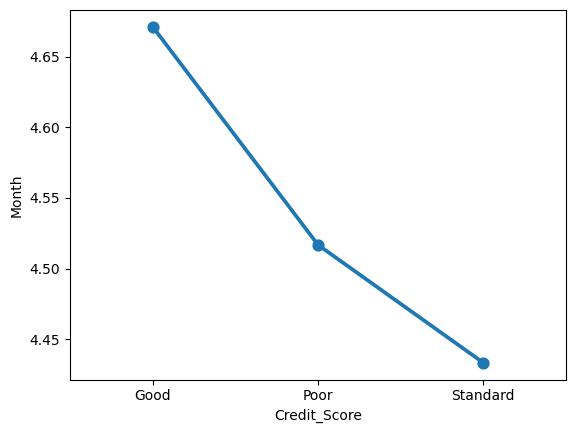

In [6]:
pd.crosstab(index=df['Credit_Score'],columns=df['Month']).plot.bar()
plt.show()
sns.pointplot(x ='Credit_Score', y ='Month', data = df.groupby(['Credit_Score'])['Month'].mean().reset_index())
plt.show()

### Insight:
- On an average We have Around 4.5 Months data for each Credit_Score.
- Not a balanced Dataset.

In [7]:
df['Age'] =df['Age'].str.replace('_', '',regex=False).str.replace(']', '',regex=False).str.replace('[', '',regex=False)
df['Age'] = df['Age'].astype(int) 


<Axes: >

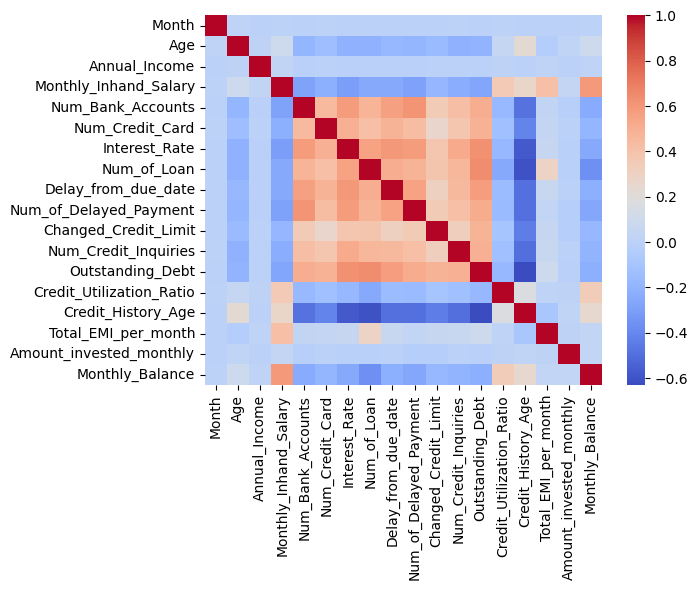

In [9]:
x = df.corr(numeric_only=True)
sns.heatmap(x,cmap='coolwarm')

### Insight 
- there are so many columns in between that are co related to each other. need to analise them  

<Axes: xlabel='Age', ylabel='Annual_Income'>

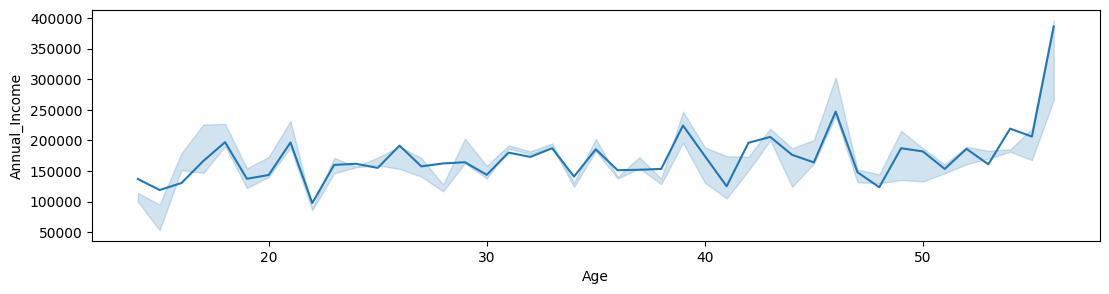

In [10]:
plt.figure(figsize=(13,3))
sns.lineplot(x ='Age', y = 'Annual_Income', data = df, n_boot=2)

### Insight:
- in general with increase in age annual income is increasing 

<Axes: xlabel='Age', ylabel='Monthly_Inhand_Salary'>

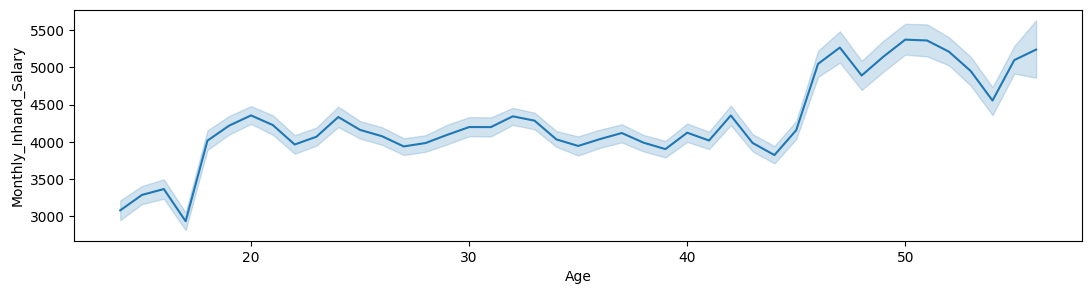

In [11]:
plt.figure(figsize=(13,3))
sns.lineplot(x ='Age', y = 'Monthly_Inhand_Salary', data = df)

### Insight
- with increase in age Monthly Inhand salary is also increasing

<Axes: xlabel='Num_Bank_Accounts', ylabel='Num_Credit_Card'>

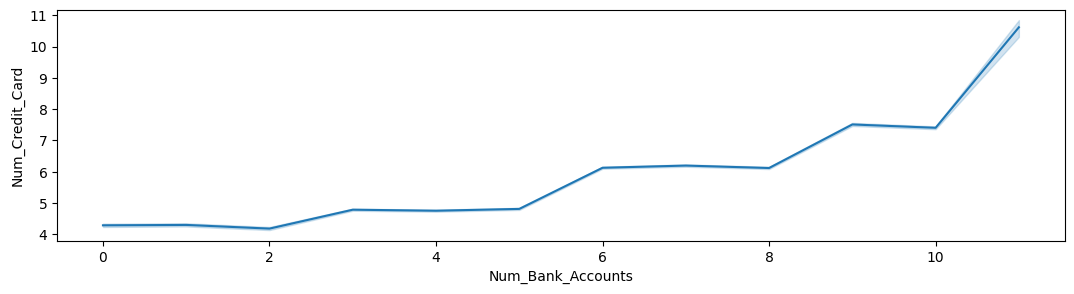

In [12]:
plt.figure(figsize=(13,3))
sns.lineplot(x ='Num_Bank_Accounts', y = 'Num_Credit_Card', data = df)

<Figure size 800x100 with 0 Axes>

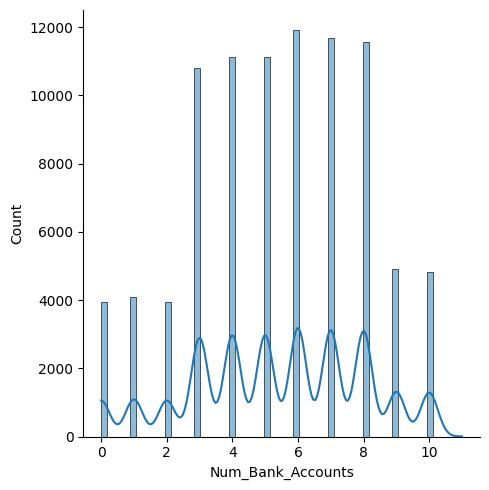

In [13]:
plt.figure(figsize=(8,1))
ax = sns.displot(df['Num_Bank_Accounts'], kde=True)


# how can you take loan without a bank account?

changing all 0 to 1 as people with loan must have atleast 1 account.


In [14]:
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].replace(to_replace=0, value=1)

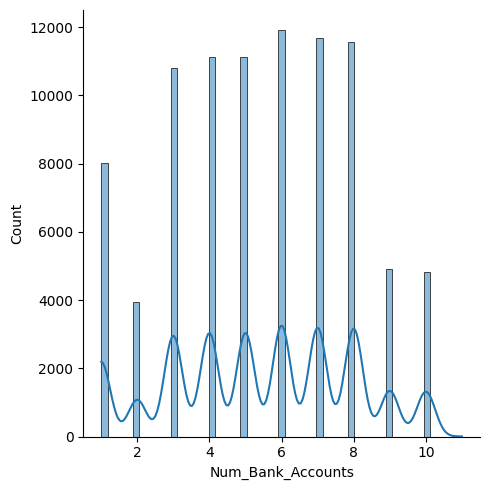

In [16]:
sns.displot(df['Num_Bank_Accounts'],kde=True)

<Axes: xlabel='Credit_Score', ylabel='Age'>

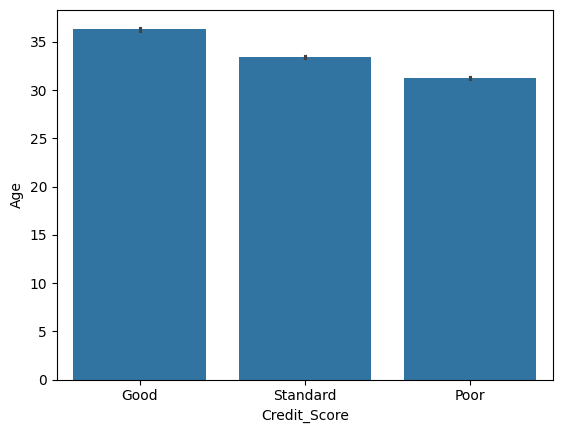

In [17]:
sns.barplot(x ='Credit_Score', y ='Age', data = df)

### Insight:
- On an average :
    - age of Good credit score: 35
    - age of Standard credit score: 30.5
    - age of Poor credit score: 30
- This indicates that more age = better credit score.

In [18]:
df.columns

Index(['Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

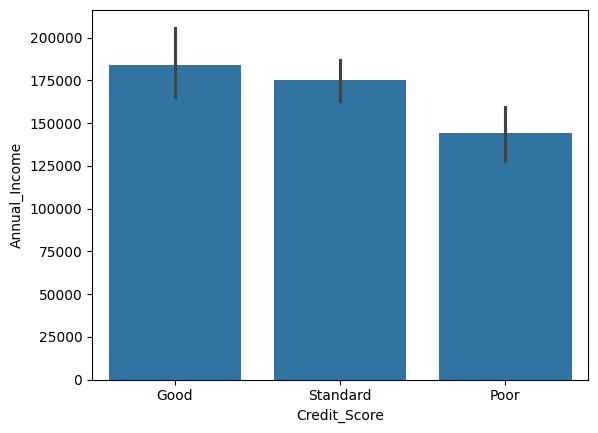

In [19]:
sns.barplot(x ='Credit_Score', y ='Annual_Income', data = df)

# Insight:
- Shows that people with better annual income has better credit score.

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

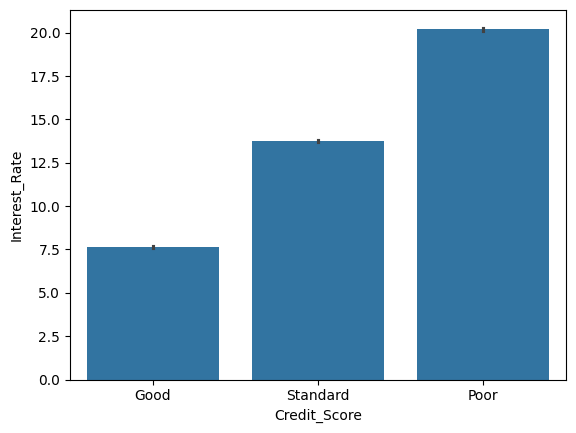

In [20]:
sns.barplot(x ='Credit_Score', y ='Interest_Rate', data = df)

# Insight:
- people with more interest rate have poor credit_score

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

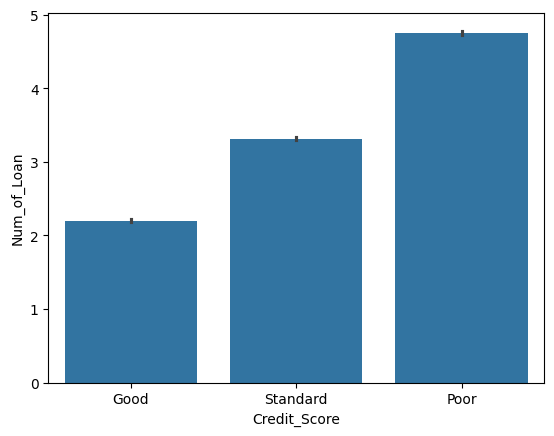

In [21]:
sns.barplot(x ='Credit_Score', y ='Num_of_Loan', data = df)

Insight: 
- Customers with more loans have poor Credit_Score

In [22]:
pd.crosstab(index=df['Credit_Score'], columns=df['Type_of_Loan'])

Type_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,missing
Credit_Score,,,,,,,,,,
Good,1365,1523,1300,1397,1496,1412,1533,1468,1459,3107
Poor,2780,2949,2650,2601,2674,2815,2870,2851,2654,1197
Standard,4444,4903,4731,4412,4527,4605,4794,4860,4581,5972


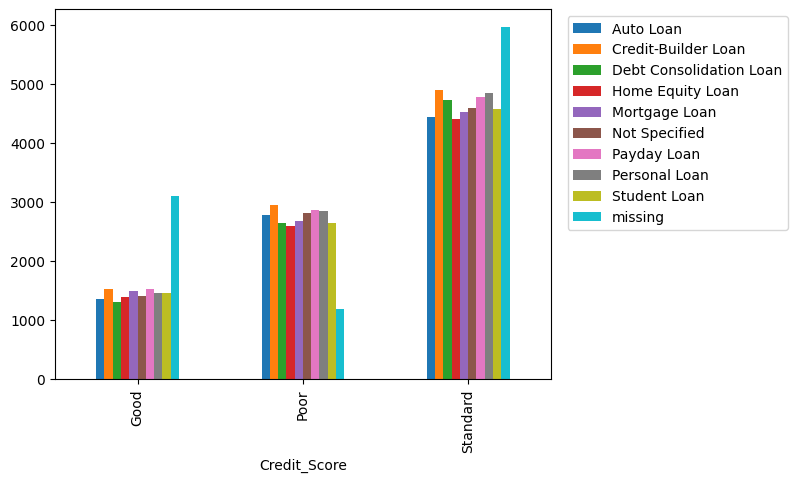

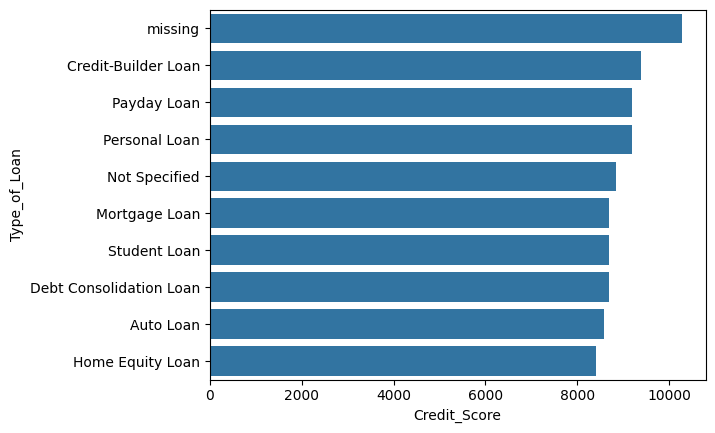

In [23]:
pd.crosstab(index=df['Credit_Score'], columns=df['Type_of_Loan']).plot.bar()
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()
sns.barplot(x ='Credit_Score', y ='Type_of_Loan',data = df.groupby(['Type_of_Loan'])['Credit_Score'].count().reset_index().sort_values(by ='Credit_Score',ascending=False))
plt.show()

# Insight:
- mostly people did not disclosed which type of loan was it.
- people with good credit score mostly dont desclosed the type.
- other than that Credit-Builder Loan ans Payday Loan is most common.

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

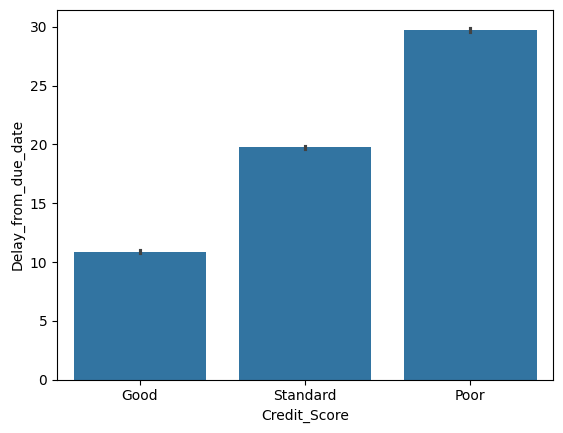

In [24]:
sns.barplot(x ='Credit_Score', y ='Delay_from_due_date',data = df)

# Insights:
- Delay from due date is directly related to Credit Score

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

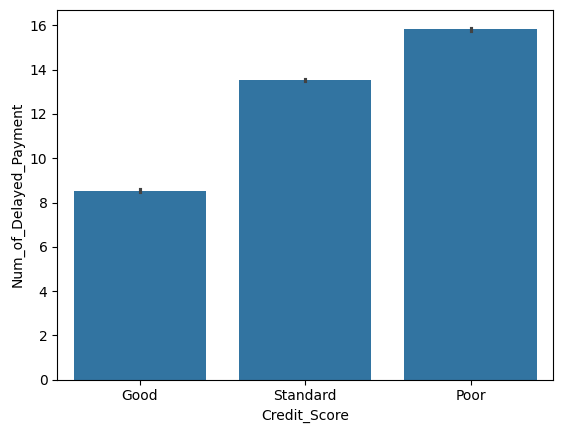

In [25]:
sns.barplot(x ='Credit_Score', y ='Num_of_Delayed_Payment',data = df)

# Insights:
- Credit Score is good when there are less delay in payments

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Inquiries'>

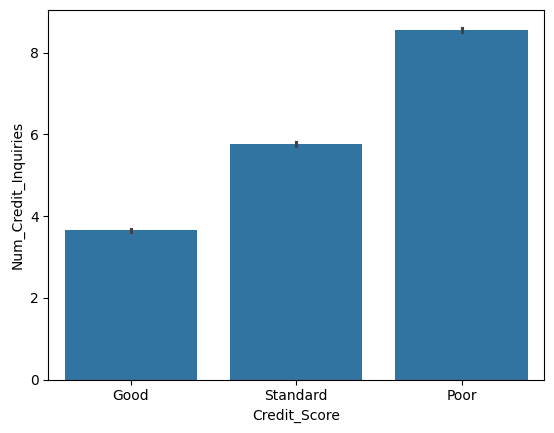

In [26]:
sns.barplot(x ='Credit_Score', y ='Num_Credit_Inquiries',data = df)

# Insights:
- Inqueries related to Credits increases when credit_score starts going down.

[]

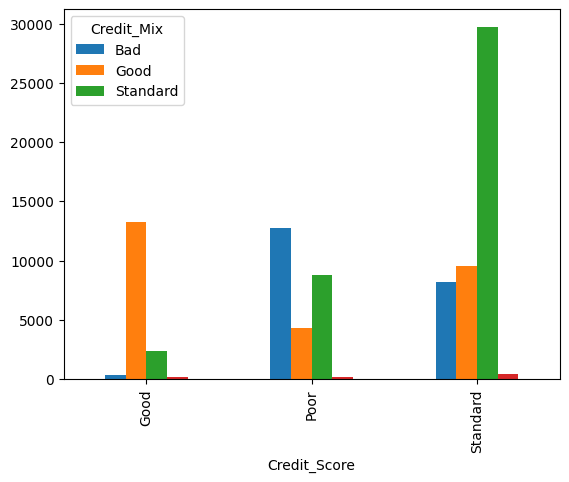

In [27]:
pd.crosstab(index=df['Credit_Score'], columns=df['Credit_Mix']).plot.bar()
plt.plot()

# Insight:
- Credit_Mix is genrally representing type of Credit score.

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

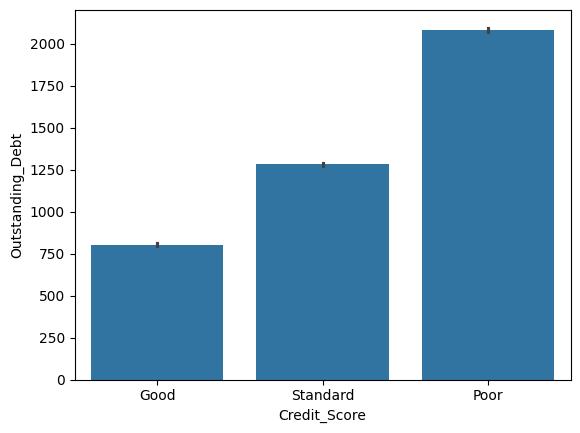

In [28]:
sns.barplot(x ='Credit_Score', y ='Outstanding_Debt',data =df )

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

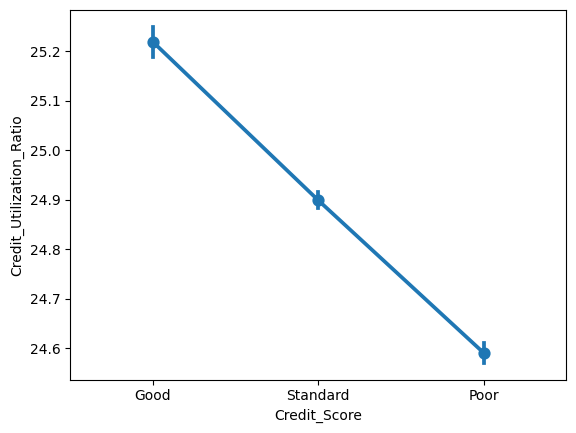

In [29]:
sns.pointplot(x ='Credit_Score', y ='Credit_Utilization_Ratio',data =df )

# Insights:
- Credit was utilized as per Credit scores.

<Axes: xlabel='Credit_Score'>

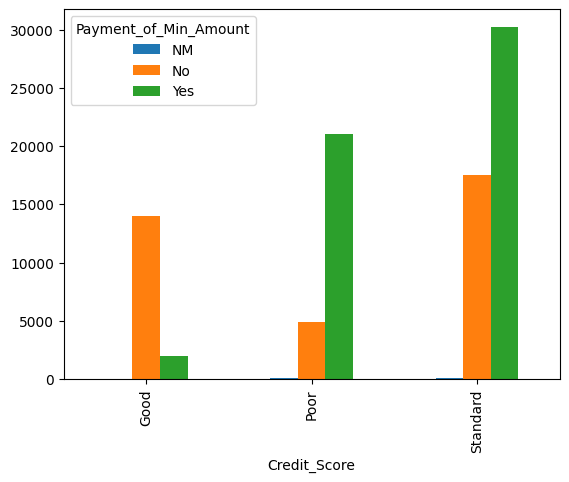

In [30]:
pd.crosstab(index=df['Credit_Score'],columns=df['Payment_of_Min_Amount']).plot.bar()

# Insight:
- minimum payment is decreasing as credit score is improving.

<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

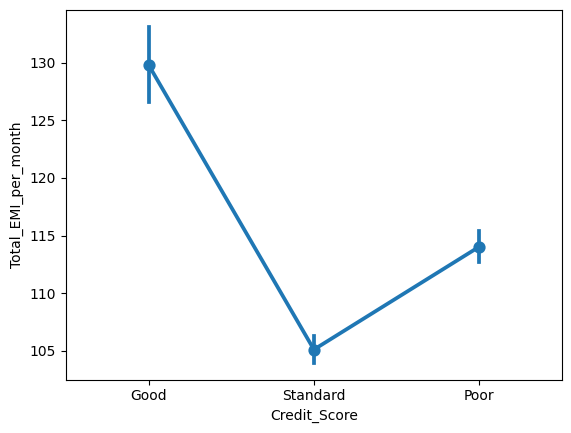

In [31]:
sns.pointplot(x ='Credit_Score', y ='Total_EMI_per_month',data =df )

# Insight :
- People with Good credit score is paying more EMIs per month.

<Axes: xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

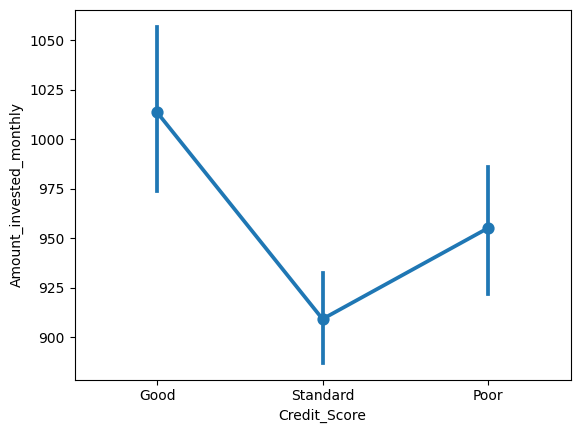

In [32]:
sns.pointplot(x ='Credit_Score', y ='Amount_invested_monthly',data =df )

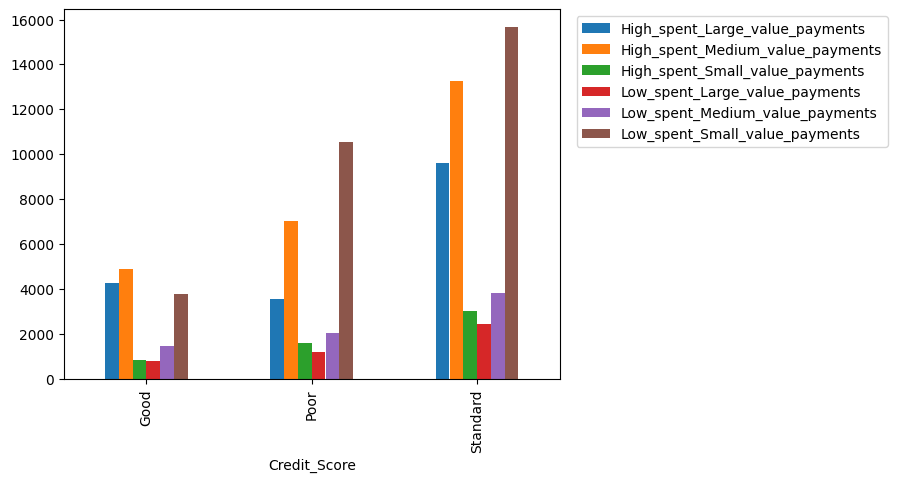

In [33]:
pd.crosstab(index=df['Credit_Score'], columns=df['Payment_Behaviour']).plot.bar()
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Insights:
- people with poor credit score tends to spend a relatively high amount of money on payments with a small value. It suggests a payment behavior characterized by larger payments for smaller transactions.
- overal people with good credit score tends to spend less money and people with poor credit score tends to spend more. but people with standard credit score spent maximum money.

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

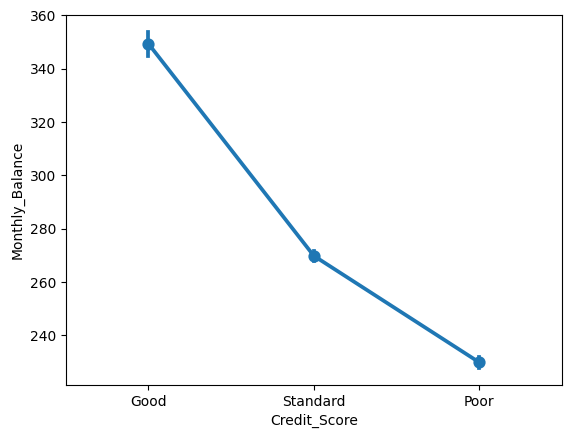

In [34]:
sns.pointplot(x ='Credit_Score', y ='Monthly_Balance',data =df )

# Insights:
- People with highest monthly balance have a good credit score.
- People with very low credit score have a poor credit score.

# Thank you